<a href="https://colab.research.google.com/github/yoonsongg/project_EDA/blob/main/project_EDA_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#다음 분기에 어떤 게임을 설계해야 할까

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = '/content/drive/MyDrive/AI_Bootcamp/Section1_Project_data/vgames2.csv'

data = pd.read_csv(url, header = 0, index_col = 0)

data.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [4]:
#결측치 제거
data.isna().sum()
df = data.dropna()

In [5]:
data.shape

(16598, 9)

In [6]:
df.shape

(16241, 9)

In [7]:
df.Genre.value_counts()
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [8]:
# df.Publisher.value_counts()
# df.Publisher.unique()

In [9]:
# df.EU_Sales.value_counts()
# df.EU_Sales.unique()

In [10]:
# df.JP_Sales.value_counts()
# df.JP_Sales.unique()

In [11]:
# df.Other_Sales.value_counts()
# df.Other_Sales.unique()
# df.Other_Sales.dtype

In [12]:
df['Year'] = df['Year'].astype(int)

<ipython-input-12-91b4af12fd7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


In [13]:
#Year 전처리 필요
#df.Year.value_counts().tail(50)

condition  = df[df['Year'] < 100].index
condition
df.drop(condition, axis = 0, inplace = True)

<ipython-input-13-0f4f5060d02b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(condition, axis = 0, inplace = True)


In [14]:
def str_replace(x):
    if 'M' in x:
        x = x.replace('M', '')
        return float(x)
    elif 'K' in x:
        x = x.replace('K', '')
        x = float(x)
        return round(x / 1000, 2)
    else:
        return float(x)

#type(str_replace('3.5M'))
#str_replace('310K')
df['NA_Sales'] = df['NA_Sales'].apply(lambda x : str_replace(x))
df['EU_Sales'] = df['EU_Sales'].apply(lambda x : str_replace(x))
df['JP_Sales'] = df['JP_Sales'].apply(lambda x : str_replace(x))
df['Other_Sales'] = df['Other_Sales'].apply(lambda x : str_replace(x))


<ipython-input-14-836b65f5c96e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NA_Sales'] = df['NA_Sales'].apply(lambda x : str_replace(x))
<ipython-input-14-836b65f5c96e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EU_Sales'] = df['EU_Sales'].apply(lambda x : str_replace(x))
<ipython-input-14-836b65f5c96e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [15]:
df.Year.describe()

count    16141.000000
mean      2006.406356
std          5.830780
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [16]:
# Name            object
# Platform        object
# Year           float64
# Genre           object
# Publisher       object
# NA_Sales       float64
# EU_Sales       float64
# JP_Sales       float64
# Other_Sales    float64
# dtype: object

In [17]:
#여분 만들어놓기
data3 = df
data4 = df

data4['total_Sales_notJP'] = df[['NA_Sales', 'EU_Sales', 'Other_Sales']].sum(axis = 1)


<ipython-input-17-26d4077bb078>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['total_Sales_notJP'] = df[['NA_Sales', 'EU_Sales', 'Other_Sales']].sum(axis = 1)


In [18]:
#df.loc[df['Year'] == 2017]

#반드시 들어가야 하는 내용

1. 지역에 따라서 선호하는 게임 장르가 다를까

2. 연도별 게임의 트렌드가 있을까

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [19]:
df['total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)

df

<ipython-input-19-3a7f38d1204e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales_notJP,total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.76,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.13,0.38


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1251: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1252: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


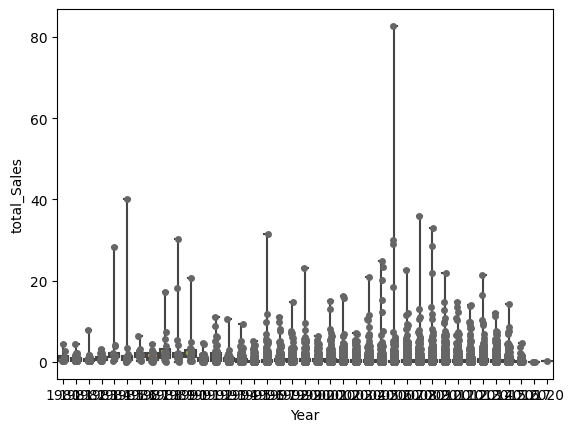

In [20]:
sns.boxplot(x = 'Year', y = 'total_Sales', data = df, whis = np.inf)
sns.stripplot(x = 'Year', y = 'total_Sales', data = df, jitter = True, color = '0.4')
plt.show()

In [21]:
q1 = df['total_Sales'].quantile(0.25)
q2 = df['total_Sales'].quantile(0.75)
iqr = q2 - q1

condition2 = ((df['total_Sales'] > q2 + 3 * iqr) | (df['total_Sales'] < q1 - 3 * iqr))
condition2 = df[condition2].index
df2 = df.drop(condition2)
df2.shape

(15150, 11)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1251: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1252: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


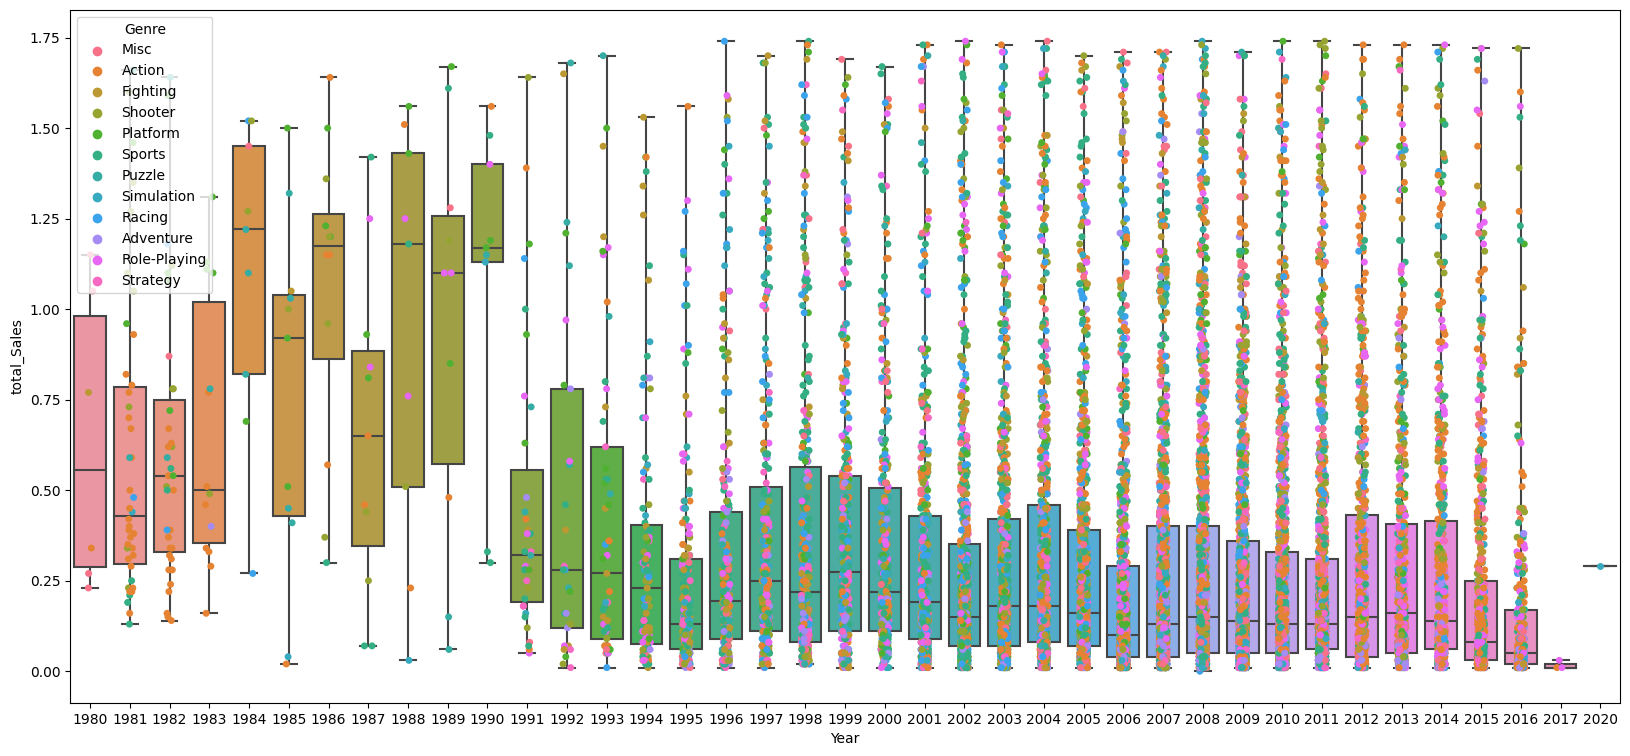

In [22]:
plt.figure(figsize = (20,9))
sns.boxplot(x = 'Year', y = 'total_Sales', data = df2, whis = np.inf)
sns.stripplot(x = 'Year', y = 'total_Sales', hue = 'Genre', data = df2)
plt.show()

In [23]:
df.loc[df['Year'] == 1992].sort_values('total_Sales', ascending= False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales_notJP,total_Sales
6848,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,8.49,11.18
9583,Super Mario Kart,SNES,1992,Racing,Nintendo,3.54,1.24,3.81,0.18,4.96,8.77
12569,Street Fighter II: The World Warrior,SNES,1992,Fighting,Capcom,2.47,0.83,2.87,0.12,3.42,6.29
5041,Sonic the Hedgehog 2,GEN,1992,Platform,Sega,4.47,1.20,0.16,0.19,5.86,6.02
14337,Kirby's Dream Land,GB,1992,Platform,Nintendo,2.71,0.61,1.70,0.11,3.43,5.13
4921,Street Fighter II Turbo,SNES,1992,Fighting,Capcom,1.42,0.51,2.10,0.07,2.00,4.10
13174,The Legend of Zelda: Link's Awakening,GB,1992,Action,Nintendo,2.21,0.96,0.54,0.13,3.30,3.84
9602,Dragon Quest V: Tenkuu no Hanayome,SNES,1992,Role-Playing,Enix Corporation,0.00,0.00,2.78,0.01,0.01,2.79
3931,Mario Paint,SNES,1992,Misc,Nintendo,1.43,0.54,0.71,0.07,2.04,2.75
12402,Mortal Kombat,GEN,1992,Fighting,Arena Entertainment,1.95,0.63,0.00,0.09,2.67,2.67


In [24]:
#Genre 기준으로 total_Sales 그래프..
plt.figure(figsize = (20,9))
df2[['Genre','total_Sales']].set_index('Genre', inplace = True)
df3 = df2[['Genre', 'total_Sales']].set_index('Genre').groupby('Genre').sum('total_Sales').sort_values('total_Sales',ascending = False)


<Figure size 2000x900 with 0 Axes>

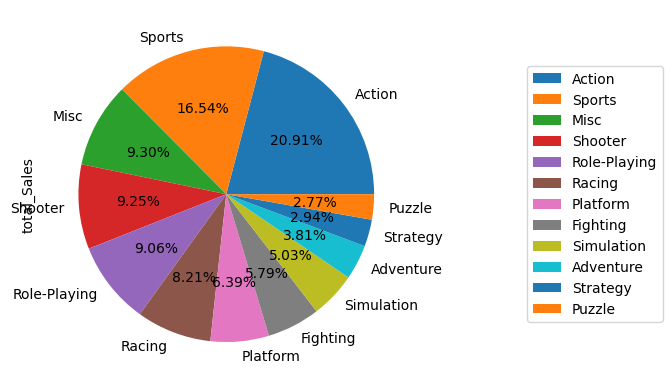

In [25]:
df3.plot(kind = 'pie', y = 'total_Sales', autopct = '%0.2f%%')
plt.legend(df3.index, loc = 'center right', bbox_to_anchor = (1.2, 0, 0.5, 1))

# 지역에 따라 선호하는 게임 장르가 다를까


In [26]:
#1) 데이터프레임 만들기
df_Genre_Sales = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df4 = df_Genre_Sales
df4 = df4.groupby('Genre').sum()
df4
df10 = df4.sum(axis = 0)


<Axes: >

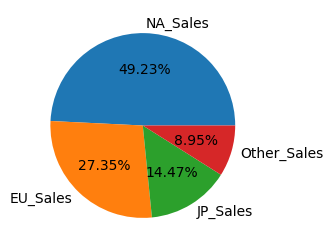

In [27]:

plt.figure(figsize = (3,3))
df10.plot(kind = 'pie', autopct = '%0.2f%%')


In [28]:
#2) 카이제곱테스트
chi_NA_EU = chi2_contingency(df4[['NA_Sales','EU_Sales']], correction = True)
chi_NA_JP = chi2_contingency(df4[['NA_Sales','JP_Sales']], correction = True)
chi_NA_Ot = chi2_contingency(df4[['NA_Sales','Other_Sales']], correction = True)
chi_EU_JP = chi2_contingency(df4[['EU_Sales','JP_Sales']], correction = True)
chi_EU_Ot = chi2_contingency(df4[['EU_Sales','Other_Sales']], correction = True)
chi_JP_Ot = chi2_contingency(df4[['JP_Sales','Other_Sales']], correction = True)

In [29]:
chi_NA_EU # 지역과 선호하는 게임 사이 비율의 차이가 존재한다.

Chi2ContingencyResult(statistic=20.985201205324543, pvalue=0.03352469911391341, dof=11, expected_freq=array([[879.71614771, 488.76385229],
       [105.84390252,  58.80609748],
       [205.60009318, 114.22990682],
       [386.97147889, 214.99852111],
       [412.61443833, 229.24556167],
       [110.17665626,  61.21334374],
       [377.84312532, 209.92687468],
       [310.74329814, 172.64670186],
       [564.51152747, 313.63847253],
       [188.81549376, 104.90450624],
       [664.71127898, 369.30872102],
       [ 72.33255944,  40.18744056]]))

In [30]:
chi_NA_JP

Chi2ContingencyResult(statistic=531.2716521419799, pvalue=6.817912776198918e-107, dof=11, expected_freq=array([[781.84207862, 229.84792138],
       [118.33235386,  34.78764614],
       [236.86563779,  69.63436221],
       [384.85836092, 113.14163908],
       [441.79885094, 129.88114906],
       [136.93384131,  40.25615869],
       [316.07072496,  92.91927504],
       [497.17054082, 146.15945918],
       [470.04498165, 138.18501835],
       [188.95154467,  55.54845533],
       [617.40400225, 181.50599775],
       [ 89.60708223,  26.34291777]]))

In [31]:
chi_NA_Ot

Chi2ContingencyResult(statistic=20.911779177645613, pvalue=0.03429665412863644, dof=11, expected_freq=array([[879.62154017, 159.97845983],
       [ 99.81623037,  18.15376963],
       [216.78321932,  39.42678068],
       [394.99203886,  71.83796114],
       [417.65100851,  75.95899149],
       [112.8633294 ,  20.5266706 ],
       [363.66038665,  66.13961335],
       [306.11608024,  55.67391976],
       [568.34415616, 103.36584384],
       [179.61337105,  32.66662895],
       [673.55860261, 122.50139739],
       [ 66.86003665,  12.15996335]]))

In [32]:
chi_EU_JP

Chi2ContingencyResult(statistic=434.20780335347206, pvalue=3.297422797741993e-86, dof=11, expected_freq=array([[437.01228452, 231.23771548],
       [ 75.277941  ,  39.832059  ],
       [121.70947441,  64.40052559],
       [203.63824209, 107.75175791],
       [214.90606351, 113.71393649],
       [ 69.69961734,  36.88038266],
       [189.4014184 , 100.2185816 ],
       [335.1964333 , 177.3635667 ],
       [225.35642835, 119.24357165],
       [115.18944077,  60.95055923],
       [329.7750613 , 174.4949387 ],
       [ 60.70759502,  32.12240498]]))

In [33]:
chi_EU_Ot #차이없음

Chi2ContingencyResult(statistic=7.631536787459691, pvalue=0.7458804145758584, dof=11, expected_freq=array([[524.47452973, 171.68547027],
       [ 60.24043811,  19.71956189],
       [102.32436599,  33.49563401],
       [211.11275098,  69.10724902],
       [188.75990207,  61.79009793],
       [ 47.29733248,  15.48266752],
       [233.87242626,  76.55757374],
       [174.04634834,  56.97365166],
       [307.44019491, 100.63980509],
       [108.42676155,  35.49323845],
       [377.76088643, 123.65911357],
       [ 42.11406316,  13.78593684]]))

In [34]:
chi_JP_Ot

Chi2ContingencyResult(statistic=279.9497674252815, pvalue=1.4525650717790285e-53, dof=11, expected_freq=array([[209.66253938, 129.70746062],
       [ 42.27600427,  26.15399573],
       [ 75.67423299,  46.81576701],
       [108.88712192,  67.36287808],
       [111.43245492,  68.93754508],
       [ 42.36867416,  26.21132584],
       [ 81.33327433,  50.31672567],
       [241.53480389, 149.42519611],
       [ 85.3551476 ,  52.8048524 ],
       [ 58.50559118,  36.19440882],
       [164.52612447, 101.78387553],
       [ 36.65403088,  22.67596912]]))

#연도별 게임의 트렌드가 있을까

In [35]:
#platform 분석
# df_platform_trend = df[['Platform','Year','total_Sales']]
# df_platform_trend2 = df_platform_trend.groupby(['Year','Platform']).sum()
# df_platform_trend2 = df_platform_trend2.unstack()
# dpt = df_platform_trend2
# dpt = dpt.T.fillna(0)
# dpt.reset_index(inplace = True)
# dpt2 = dpt.iloc[:, 1:]
# dpt2.set_index('Platform', inplace = True)
# dpt_analysis = dpt2.iloc[:, 15 : 35]
# dpt_analysis = dpt_analysis.T

# plt.rcParams['figure.figsize'] = [20, 8]
# sns.lineplot(data = dpt_analysis)

# plt.show()

In [36]:
#1) 데이터프레임 만들기

df_year_trend = df[['Genre', 'Year', 'total_Sales']]
df_year_trend

,Genre,Year,total_Sales
1,Action,2008,0.04
2,Action,2009,0.18
3,Adventure,2010,0.02
4,Misc,2010,0.04
5,Platform,2010,0.25
...,...,...,...
16594,Platform,2006,0.20
16595,Action,2005,0.01
16596,Sports,2015,0.79
16597,Action,2013,0.38


In [37]:
df_year_trend2 = df_year_trend.groupby(['Year', 'Genre']).sum()
# df_year_trend3 = pd.DataFrame(df_year_trend2.transform('total_Sales'))
df_year_trend2 = df_year_trend2.unstack()

In [38]:
dyt = df_year_trend2
dyt = dyt.T.fillna(0)
dyt

Year                      1980   1981   1982  1983   1984   1985   1986  1987  \
            Genre                                                               
total_Sales Action        0.34  14.79   6.50  2.86   1.85   3.52  13.74  1.11   
            Adventure     0.00   0.00   0.00  0.40   0.00   0.00   0.00  4.38   
            Fighting      0.77   0.00   0.00  0.00   0.00   1.05   0.00  5.42   
            Misc          2.70   0.00   0.87  2.14   1.45   0.00   0.00  0.00   
            Platform      0.00   6.92   5.03  6.93   0.69  43.17   8.34  1.74   
            Puzzle        0.00   2.25  10.04  0.78   3.14   3.21   0.00  0.00   
            Racing        0.00   0.48   1.57  0.00   5.95   0.00   1.96  0.00   
            Role-Playing  0.00   0.00   0.00  0.00   0.00   0.00   2.52  4.65   
            Shooter       7.07  10.02   3.81  0.49  31.10   1.00   3.89  0.69   
            Simulation    0.00   0.44   0.00  0.00   0.00   0.04   0.00  0.00   
            Sports        0.00   0.78   1.06  3.20   6.17   1.96   5.58  3.71   
            Strategy      0.00   0.00   0.00  0.00   0.00   0.00   0.00  0.00   

Year                       1988   1989  ...    2009    2010    2011    2012  \
            Genre                       ...                                   
total_Sales Action         1.74   4.65  ...  138.13  117.50  118.95  120.78   
            Adventure      0.00   0.00  ...   20.65   16.57   15.82    5.90   
            Fighting       0.00   0.00  ...   32.18   14.88   22.11    9.53   
            Misc           0.00   1.28  ...   76.36   88.40   55.77   22.63   
            Platform      27.73  20.66  ...   40.95   31.98   28.12   18.54   
            Puzzle         5.58  37.75  ...   20.27   11.11    4.91    1.74   
            Racing         2.14   0.00  ...   34.09   34.93   34.86   14.43   
            Role-Playing   5.88   2.20  ...   47.96   52.91   43.95   47.77   
            Shooter        0.51   1.19  ...   69.65   77.36   97.85   72.38   
            Simulation     0.03   0.00  ...   33.52   21.90   15.06   13.37   
            Sports         3.60   5.72  ...  138.59   92.02   57.06   30.90   
            Strategy       0.00   0.00  ...   12.35   13.68    8.87    3.33   

Year                        2013   2014   2015   2016  2017  2020  
            Genre                                                  
total_Sales Action        125.21  99.01  68.20  19.83  0.01  0.00  
            Adventure       6.61   6.09   8.01   1.79  0.00  0.00  
            Fighting        7.21  15.77   7.78   3.85  0.00  0.00  
            Misc           25.47  23.73  11.51   1.09  0.00  0.00  
            Platform       25.09   8.87   6.05   2.08  0.00  0.00  
            Puzzle          1.00   1.50   0.69   0.00  0.00  0.00  
            Racing         13.02  16.71   7.92   1.62  0.00  0.00  
            Role-Playing   30.54  45.88  36.38   6.75  0.04  0.00  
            Shooter        62.73  65.99  66.12  13.97  0.00  0.00  
            Simulation      8.68   5.54   5.61   0.39  0.00  0.29  
            Sports         41.54  44.26  41.49  14.46  0.00  0.00  
            Strategy        6.32   0.97   1.82   0.52  0.00  0.00  

[12 rows x 39 columns]

In [39]:
dyt.reset_index(inplace = True)
dyt

Year,level_0,Genre,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,total_Sales,Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,...,138.13,117.50,118.95,120.78,125.21,99.01,68.20,19.83,0.01,0.00
1,total_Sales,Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,...,20.65,16.57,15.82,5.90,6.61,6.09,8.01,1.79,0.00,0.00
2,total_Sales,Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,...,32.18,14.88,22.11,9.53,7.21,15.77,7.78,3.85,0.00,0.00
3,total_Sales,Misc,2.70,0.00,0.87,2.14,1.45,0.00,0.00,0.00,...,76.36,88.40,55.77,22.63,25.47,23.73,11.51,1.09,0.00,0.00
4,total_Sales,Platform,0.00,6.92,5.03,6.93,0.69,43.17,8.34,1.74,...,40.95,31.98,28.12,18.54,25.09,8.87,6.05,2.08,0.00,0.00
5,total_Sales,Puzzle,0.00,2.25,10.04,0.78,3.14,3.21,0.00,0.00,...,20.27,11.11,4.91,1.74,1.00,1.50,0.69,0.00,0.00,0.00
6,total_Sales,Racing,0.00,0.48,1.57,0.00,5.95,0.00,1.96,0.00,...,34.09,34.93,34.86,14.43,13.02,16.71,7.92,1.62,0.00,0.00
7,total_Sales,Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.52,4.65,...,47.96,52.91,43.95,47.77,30.54,45.88,36.38,6.75,0.04,0.00
8,total_Sales,Shooter,7.07,10.02,3.81,0.49,31.10,1.00,3.89,0.69,...,69.65,77.36,97.85,72.38,62.73,65.99,66.12,13.97,0.00,0.00
9,total_Sales,Simulation,0.00,0.44,0.00,0.00,0.00,0.04,0.00,0.00,...,33.52,21.90,15.06,13.37,8.68,5.54,5.61,0.39,0.00,0.29


In [40]:
dyt2 = dyt.iloc[:, 1:]
dyt2

Year,Genre,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,1.74,...,138.13,117.50,118.95,120.78,125.21,99.01,68.20,19.83,0.01,0.00
1,Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,0.00,...,20.65,16.57,15.82,5.90,6.61,6.09,8.01,1.79,0.00,0.00
2,Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,0.00,...,32.18,14.88,22.11,9.53,7.21,15.77,7.78,3.85,0.00,0.00
3,Misc,2.70,0.00,0.87,2.14,1.45,0.00,0.00,0.00,0.00,...,76.36,88.40,55.77,22.63,25.47,23.73,11.51,1.09,0.00,0.00
4,Platform,0.00,6.92,5.03,6.93,0.69,43.17,8.34,1.74,27.73,...,40.95,31.98,28.12,18.54,25.09,8.87,6.05,2.08,0.00,0.00
5,Puzzle,0.00,2.25,10.04,0.78,3.14,3.21,0.00,0.00,5.58,...,20.27,11.11,4.91,1.74,1.00,1.50,0.69,0.00,0.00,0.00
6,Racing,0.00,0.48,1.57,0.00,5.95,0.00,1.96,0.00,2.14,...,34.09,34.93,34.86,14.43,13.02,16.71,7.92,1.62,0.00,0.00
7,Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.52,4.65,5.88,...,47.96,52.91,43.95,47.77,30.54,45.88,36.38,6.75,0.04,0.00
8,Shooter,7.07,10.02,3.81,0.49,31.10,1.00,3.89,0.69,0.51,...,69.65,77.36,97.85,72.38,62.73,65.99,66.12,13.97,0.00,0.00
9,Simulation,0.00,0.44,0.00,0.00,0.00,0.04,0.00,0.00,0.03,...,33.52,21.90,15.06,13.37,8.68,5.54,5.61,0.39,0.00,0.29


In [41]:
dyt2.set_index('Genre', inplace = True)


In [42]:
dyt2

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,1.74,4.65,...,138.13,117.50,118.95,120.78,125.21,99.01,68.20,19.83,0.01,0.00
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,0.00,0.00,...,20.65,16.57,15.82,5.90,6.61,6.09,8.01,1.79,0.00,0.00
Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,0.00,0.00,...,32.18,14.88,22.11,9.53,7.21,15.77,7.78,3.85,0.00,0.00
Misc,2.70,0.00,0.87,2.14,1.45,0.00,0.00,0.00,0.00,1.28,...,76.36,88.40,55.77,22.63,25.47,23.73,11.51,1.09,0.00,0.00
Platform,0.00,6.92,5.03,6.93,0.69,43.17,8.34,1.74,27.73,20.66,...,40.95,31.98,28.12,18.54,25.09,8.87,6.05,2.08,0.00,0.00
Puzzle,0.00,2.25,10.04,0.78,3.14,3.21,0.00,0.00,5.58,37.75,...,20.27,11.11,4.91,1.74,1.00,1.50,0.69,0.00,0.00,0.00
Racing,0.00,0.48,1.57,0.00,5.95,0.00,1.96,0.00,2.14,0.00,...,34.09,34.93,34.86,14.43,13.02,16.71,7.92,1.62,0.00,0.00
Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.52,4.65,5.88,2.20,...,47.96,52.91,43.95,47.77,30.54,45.88,36.38,6.75,0.04,0.00
Shooter,7.07,10.02,3.81,0.49,31.10,1.00,3.89,0.69,0.51,1.19,...,69.65,77.36,97.85,72.38,62.73,65.99,66.12,13.97,0.00,0.00


In [43]:
#chisquare 분석 / 의미가 있나 싶.. p-value 0.0

chi2_contingency(dyt2, correction = True)


Chi2ContingencyResult(statistic=3387.9095395613945, pvalue=0.0, dof=418, expected_freq=array([[2.13718196e+00, 7.00869967e+00, 5.67296095e+00, 3.30006038e+00,
        9.89035954e+00, 1.05975153e+01, 7.07745093e+00, 4.26257800e+00,
        9.27356254e+00, 1.44279426e+01, 9.69785602e+00, 6.33100870e+00,
        1.49563451e+01, 9.03391530e+00, 1.55574275e+01, 1.70267401e+01,
        3.86932080e+01, 3.94239357e+01, 4.98210902e+01, 4.89430384e+01,
        3.95280447e+01, 6.41036730e+01, 7.73667728e+01, 6.91598369e+01,
        8.01089658e+01, 8.96653907e+01, 1.00292371e+02, 1.19460222e+02,
        1.32442423e+02, 1.30568461e+02, 1.12602775e+02, 9.88702020e+01,
        7.09709415e+01, 6.94230560e+01, 6.56712016e+01, 5.13827259e+01,
        1.30332742e+01, 9.82160829e-03, 5.69653281e-02],
       [2.91673374e-01, 9.56517094e-01, 7.74221236e-01, 4.50378004e-01,
        1.34979360e+00, 1.44630317e+00, 9.65899970e-01, 5.81738255e-01,
        1.26561581e+00, 1.96906336e+00, 1.32352155e+00, 8.640287

In [44]:
dyt_1980 = dyt2.iloc[:, 0 : 10]
dyt_1990 = dyt2.iloc[ :, 10: 20]
dyt_2000 = dyt2.iloc[:, 20 : 30]
dyt_2010 = dyt2.iloc[:, 30: ]

<Axes: xlabel='Year', ylabel='Genre'>

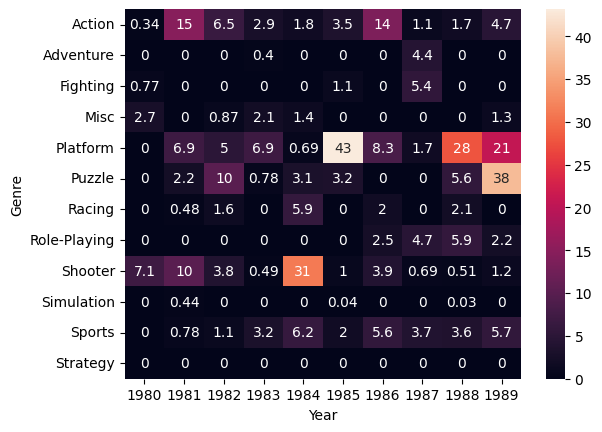

In [45]:
sns.heatmap(dyt_1980, annot= True)

<Axes: xlabel='Year', ylabel='Genre'>

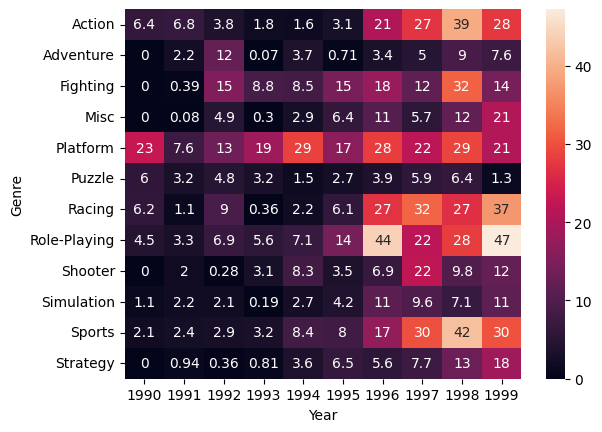

In [46]:
sns.heatmap(dyt_1990, annot= True)

<Axes: xlabel='Year', ylabel='Genre'>

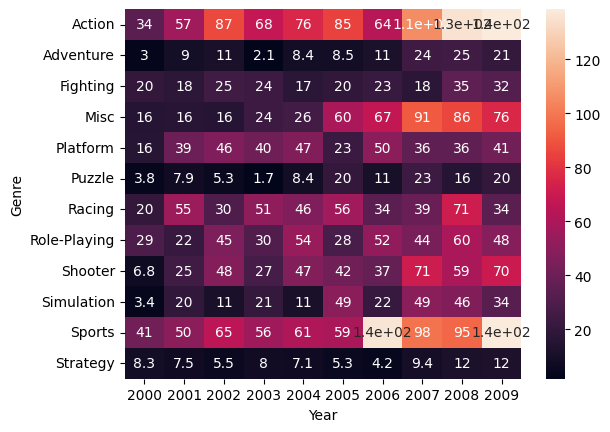

In [47]:
sns.heatmap(dyt_2000, annot= True)

<Axes: xlabel='Year', ylabel='Genre'>

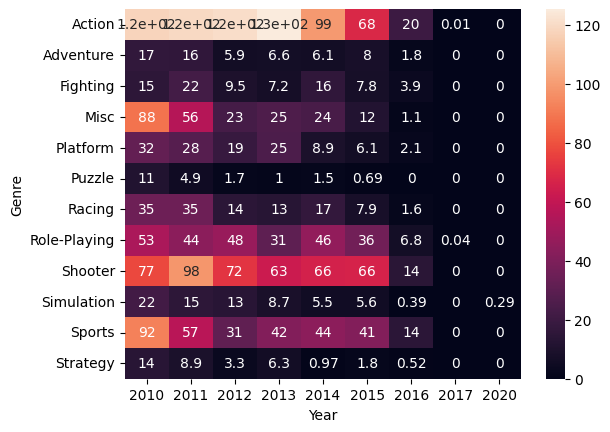

In [48]:
sns.heatmap(dyt_2010, annot= True)

In [49]:
dyt_analysis = dyt2.iloc[:, 15 : 36]
dyt_analysis = dyt_analysis.T
dyt_analysis

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1995,3.13,0.71,14.56,6.39,16.69,2.69,6.09,14.27,3.53,4.17,7.99,6.46
1996,20.60,3.36,18.04,10.66,28.23,3.92,26.95,43.99,6.90,11.33,17.39,5.61
1997,27.22,4.97,11.80,5.68,21.86,5.87,31.92,21.82,22.16,9.64,30.04,7.72
1998,39.41,9.04,31.68,11.84,28.93,6.35,26.69,28.09,9.80,7.11,41.75,12.94
1999,27.62,7.61,14.31,20.68,20.80,1.34,37.19,47.24,12.23,11.46,30.21,18.47
2000,33.89,2.96,20.26,15.55,15.96,3.83,20.00,29.04,6.81,3.37,41.24,8.32
2001,56.68,8.96,18.10,16.39,39.33,7.94,55.13,22.02,24.81,19.54,49.90,7.54
2002,86.65,11.07,24.92,15.56,45.95,5.33,30.02,45.09,47.64,10.82,65.30,5.51
2003,67.98,2.12,23.79,23.79,39.85,1.71,51.09,30.29,27.10,20.91,55.50,7.95


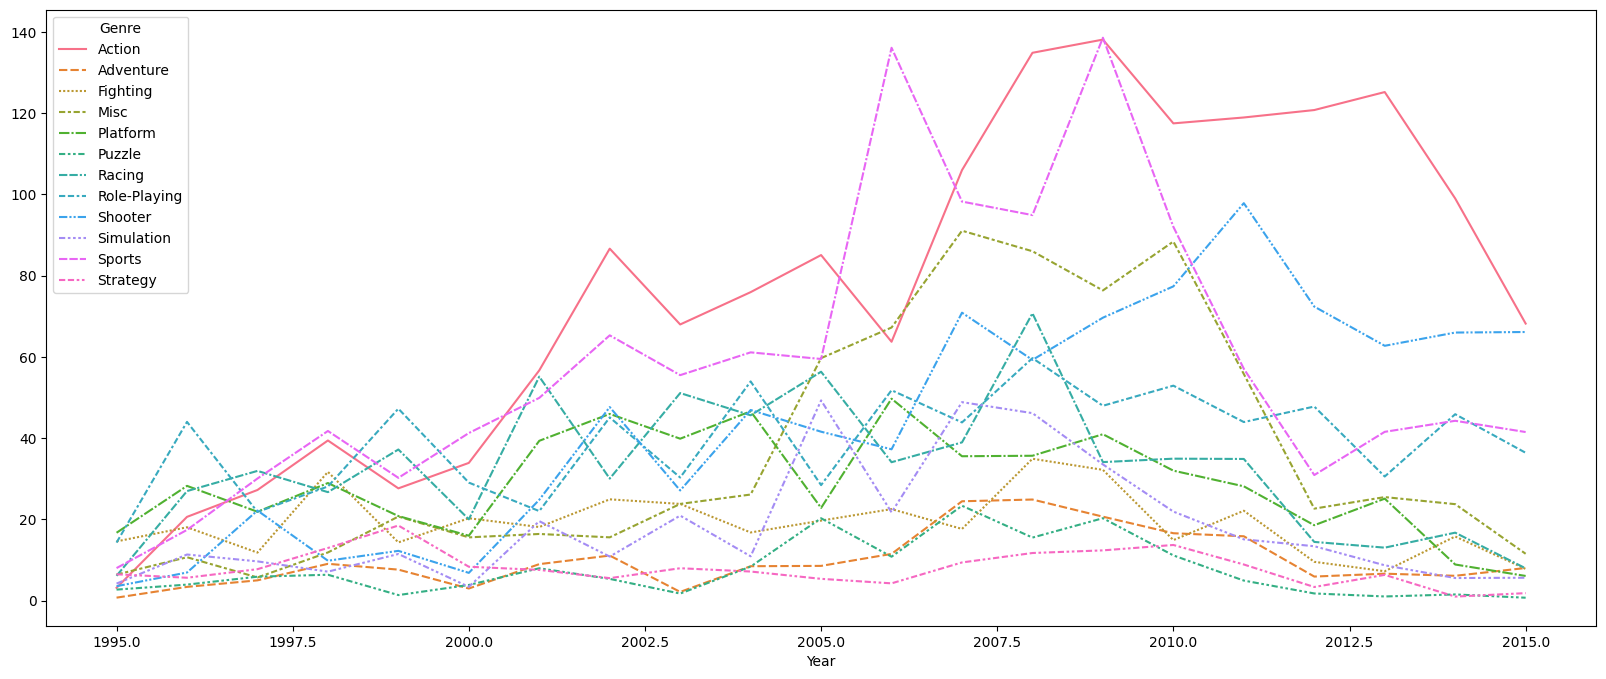

In [50]:
plt.rcParams['figure.figsize'] = [20, 8]
sns.lineplot(data = dyt_analysis)

plt.show()

#Action , Shooter 게임 출시

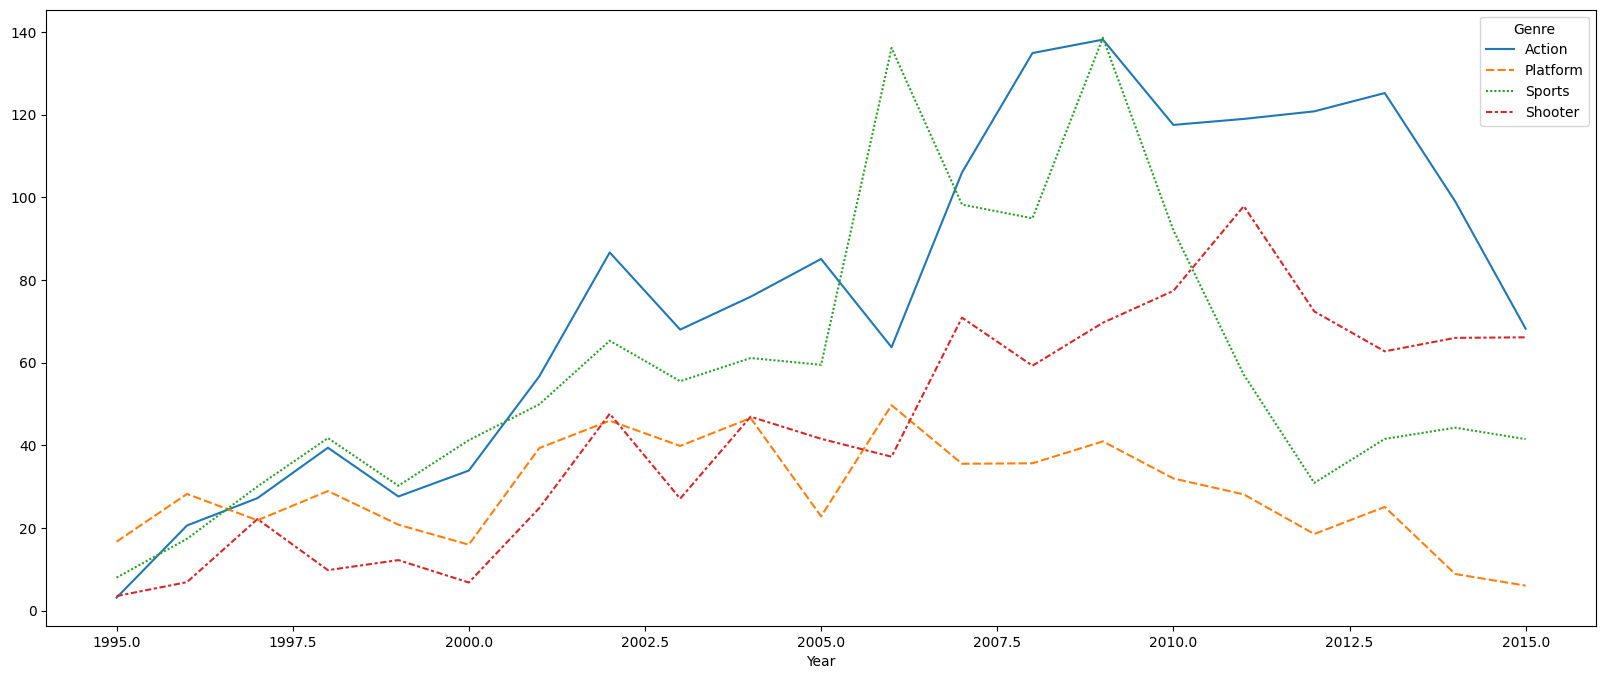

In [51]:
plt.rcParams['figure.figsize'] = [20, 8]
sns.lineplot(data = dyt_analysis[['Action','Platform','Sports','Shooter']])

plt.show()


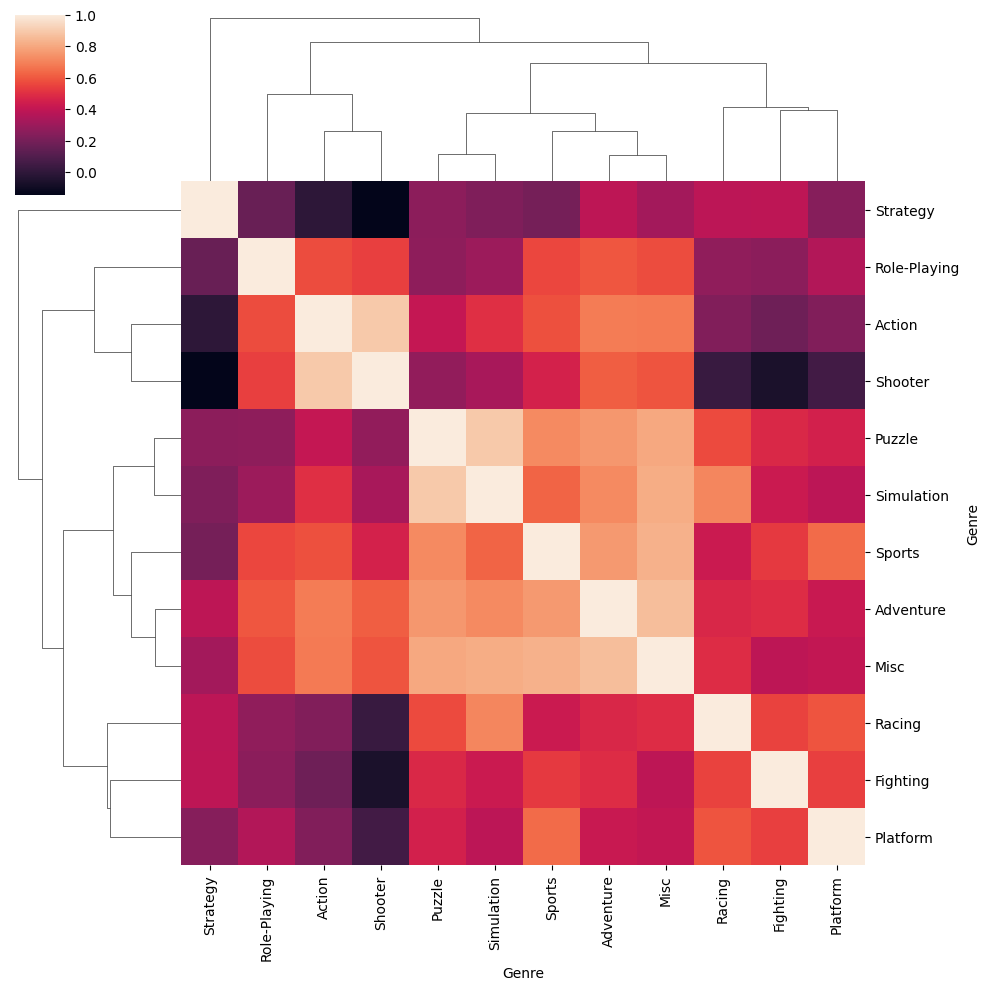

In [52]:
#각년도에 판매된 게임 판매량으로 게임 장르별 상관관계를 봄. -> cluster 해봄.
corr = dyt_analysis.corr()
sns.clustermap(corr)

In [53]:
corr

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Genre,,,,,,,,,,,,
Action,1.000000,0.683012,0.180943,0.678006,0.226660,0.408758,0.229085,0.574728,0.896852,0.498810,0.581027,-0.011032
Adventure,0.683012,1.000000,0.489969,0.864754,0.422625,0.754969,0.476259,0.593147,0.614201,0.721722,0.761567,0.390870
Fighting,0.180943,0.489969,1.000000,0.391229,0.539081,0.476592,0.552426,0.252810,-0.063251,0.426526,0.526631,0.388596
Misc,0.678006,0.864754,0.391229,1.000000,0.403307,0.801569,0.489987,0.574805,0.591882,0.812822,0.826389,0.316712
Platform,0.226660,0.422625,0.539081,0.403307,1.000000,0.449836,0.590530,0.357707,0.051439,0.384579,0.643497,0.241527
Puzzle,0.408758,0.754969,0.476592,0.801569,0.449836,1.000000,0.569668,0.263496,0.272896,0.892965,0.720880,0.260331
Racing,0.229085,0.476259,0.552426,0.489987,0.590530,0.569668,1.000000,0.266548,0.026722,0.710122,0.424880,0.383634
Role-Playing,0.574728,0.593147,0.252810,0.574805,0.357707,0.263496,0.266548,1.000000,0.541622,0.298626,0.559466,0.161661
Shooter,0.896852,0.614201,-0.063251,0.591882,0.051439,0.272896,0.026722,0.541622,1.000000,0.329031,0.458177,-0.145607


# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [54]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales_notJP,total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.76,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.13,0.38


In [55]:
df.loc[df['Year'] > 2015]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales_notJP,total_Sales
57,Sébastien Loeb Rally Evo,PS4,2016,Racing,Milestone S.r.l,0.00,0.04,0.00,0.01,0.05,0.05
109,Yakuza Kiwami,PS3,2016,Adventure,Sega,0.00,0.00,0.12,0.00,0.00,0.12
118,Jikkyou Powerful Pro Baseball 2016,PS4,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.17,0.00,0.00,0.17
167,Dragon Quest Builders: Revive Alefgard,PS4,2016,Role-Playing,Square Enix,0.00,0.00,0.22,0.00,0.00,0.22
198,NBA 2K17,X360,2016,Sports,Take-Two Interactive,0.04,0.00,0.00,0.01,0.05,0.05
...,...,...,...,...,...,...,...,...,...,...,...
16387,Deus Ex: Mankind Divided,XOne,2016,Role-Playing,Square Enix,0.08,0.06,0.00,0.01,0.15,0.15
16389,Project Setsuna,PSV,2016,Role-Playing,Square Enix,0.00,0.00,0.05,0.00,0.00,0.05
16440,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.08,2.14
16559,7 Days to Die,XOne,2016,Action,Telltale Games,0.02,0.02,0.00,0.00,0.04,0.04


In [56]:
df2 = df[['Name', 'total_Sales']]
df_top_game = df2.groupby('Name').sum()

In [57]:
df_top_game.sort_values('total_Sales', ascending = False, inplace = True)
df_top_game

,total_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.83
...,...
East India Company,0.01
Star Trek: Legacy,0.01
Monkey Madness: Island Escape,0.01


In [58]:
names = df_top_game.head(20)
df_top_game_info = df.loc[df['Name'].isin(names.index) == True]
names['Year'] = [2006, 2013, 1985, 1988, 2008, 2009, 1996, 2011, 2006, 2012, 2010, 2006, 2009, 1984, 2013, 1990, 2015, 2009, 2005, 2013]
names['Publisher'] = ['Nintendo', 'Take-Two Interactive', 'Nintendo', 'Nintendo', 'Nintendo','Nintendo', 'Nintendo', 'Activision','Nintendo','Activision', 'Activision', 'Nintendo', 'Nintendo', 'Nintendo','Activision', 'Nintendo', 'Activision', 'Activision', 'Nintendo','Take-Two Interactive']
names['Genre'] = ['Sports', 'Action','Platform', 'Puzzle','Racing','Sports', 'Role-Playing', 'Shooter', 'Platform','Shooter','Shooter','Misc','Platform','Shooter','Shooter','Platform','Shooter','Shooter','Simulation','Action']
names['Platform'] = ['Wii','XOne, X360, PS4, PS3, PC', 'NES,GB','NES, GB', 'Wii','Wii', 'GB', 'PC, PS3, X360, Wii', 'DS','WiiU, X360, PC, PS3', 'X369, DS, PS3, Wii','Wii','Wii','NES','PS3,X360,PS4,XOne, WiiU, PC','GBA, SNES', 'PS3, X360, XOne, PC, PS4', 'PS3, X360, PC', 'DS', 'XB, PC, X360, PS2']
df_top_game = names
df_top_game_platform = df_top_game[[ 'Year', 'Platform', 'Publisher', 'Genre', 'total_Sales']]
df_top_game_platform

<ipython-input-58-b0e2a5689cd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names['Year'] = [2006, 2013, 1985, 1988, 2008, 2009, 1996, 2011, 2006, 2012, 2010, 2006, 2009, 1984, 2013, 1990, 2015, 2009, 2005, 2013]
<ipython-input-58-b0e2a5689cd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names['Publisher'] = ['Nintendo', 'Take-Two Interactive', 'Nintendo', 'Nintendo', 'Nintendo','Nintendo', 'Nintendo', 'Activision','Nintendo','Activision', 'Activision', 'Nintendo', 'Nintendo', 'Nintendo','Activisi

,Year,Platform,Publisher,Genre,total_Sales
Name,,,,,
Wii Sports,2006,Wii,Nintendo,Sports,82.74
Grand Theft Auto V,2013,"XOne, X360, PS4, PS3, PC",Take-Two Interactive,Action,55.92
Super Mario Bros.,1985,"NES,GB",Nintendo,Platform,45.31
Tetris,1988,"NES, GB",Nintendo,Puzzle,35.84
Mario Kart Wii,2008,Wii,Nintendo,Racing,35.83
Wii Sports Resort,2009,Wii,Nintendo,Sports,33.00
Pokemon Red/Pokemon Blue,1996,GB,Nintendo,Role-Playing,31.38
Call of Duty: Modern Warfare 3,2011,"PC, PS3, X360, Wii",Activision,Shooter,30.84
New Super Mario Bros.,2006,DS,Nintendo,Platform,30.01


In [59]:
df_top_game_info = df_top_game_info.sort_values('total_Sales', ascending = False)

df_top_game_info.sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales_notJP,total_Sales
6249,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.53,14.64
13217,Call of Duty: Black Ops,DS,2010,Shooter,Activision,0.54,0.05,0.00,0.04,0.63,0.63
9925,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.25,12.73
7121,Call of Duty: Black Ops,Wii,2010,Shooter,Activision,0.82,0.47,0.00,0.12,1.41,1.41
12842,Call of Duty: Black Ops 3,PS3,2015,Shooter,Activision,0.49,0.96,0.07,0.27,1.72,1.79
12267,Call of Duty: Black Ops 3,X360,2015,Shooter,Activision,1.11,0.48,0.00,0.16,1.75,1.75
15982,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.28,7.29
11893,Call of Duty: Black Ops 3,PC,2015,Shooter,Activision,0.00,0.22,0.00,0.01,0.23,0.23
9071,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,13.89,14.24
10627,Call of Duty: Black Ops II,WiiU,2012,Shooter,Activision,0.21,0.18,0.00,0.03,0.42,0.42


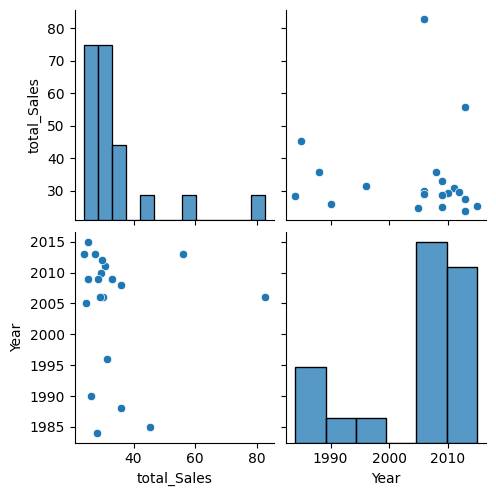

In [60]:
sns.pairplot(data = df_top_game)

<Figure size 2000x900 with 0 Axes>

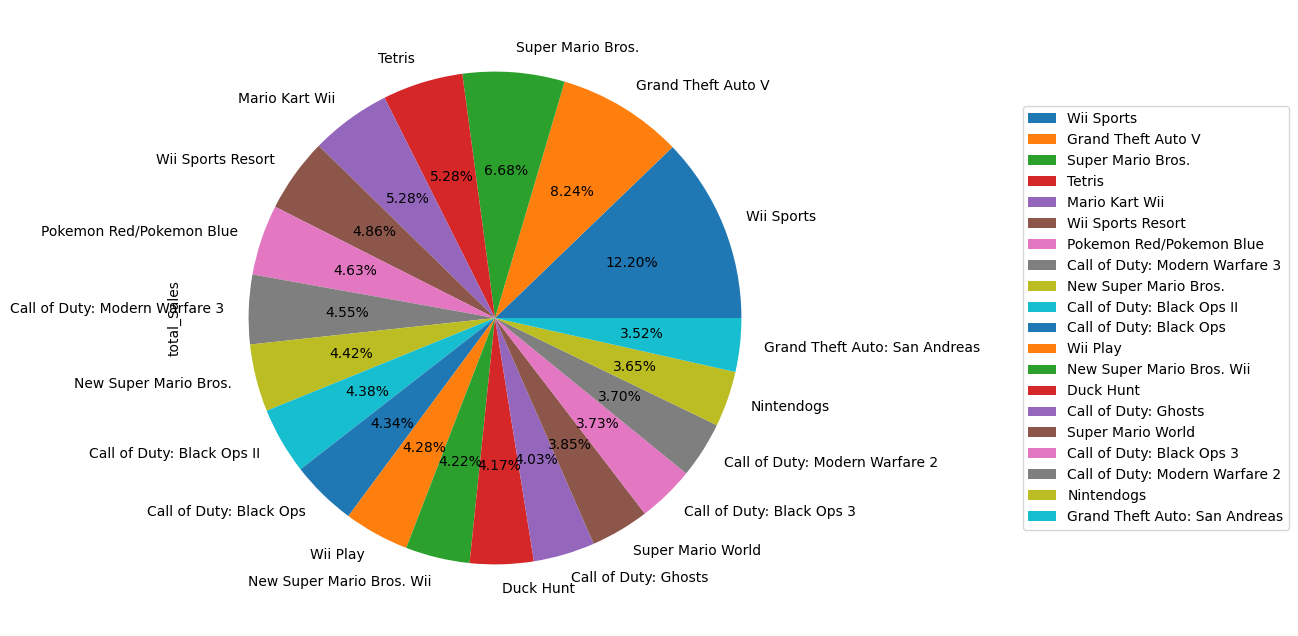

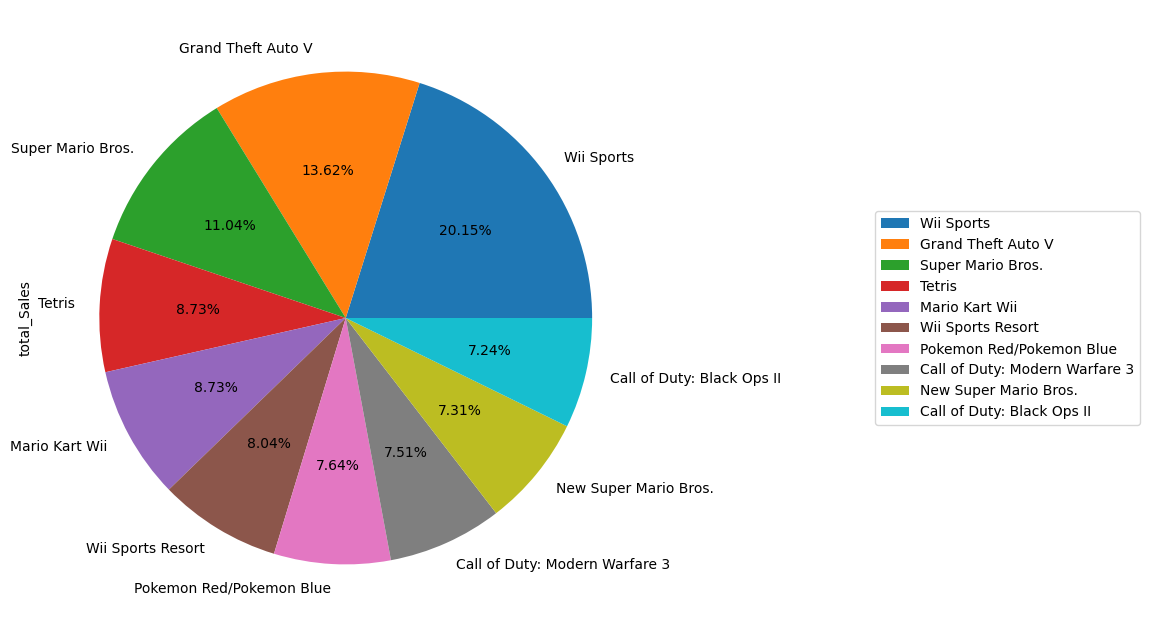

In [61]:
#total_Sales를 기준으로
plt.figure(figsize = (20,9))
df_top_game.plot(kind= 'pie', y = 'total_Sales', autopct = '%0.2f%%')
plt.legend(df_top_game.index, loc = 'center right', bbox_to_anchor = (1.3, 0, 0.5, 1))
df_top_game.head(10).plot(kind= 'pie', y = 'total_Sales', autopct = '%0.2f%%')
plt.legend(df_top_game.index, loc = 'center right', bbox_to_anchor = (1.3, 0, 0.5, 1))

<Axes: ylabel='total_Sales'>

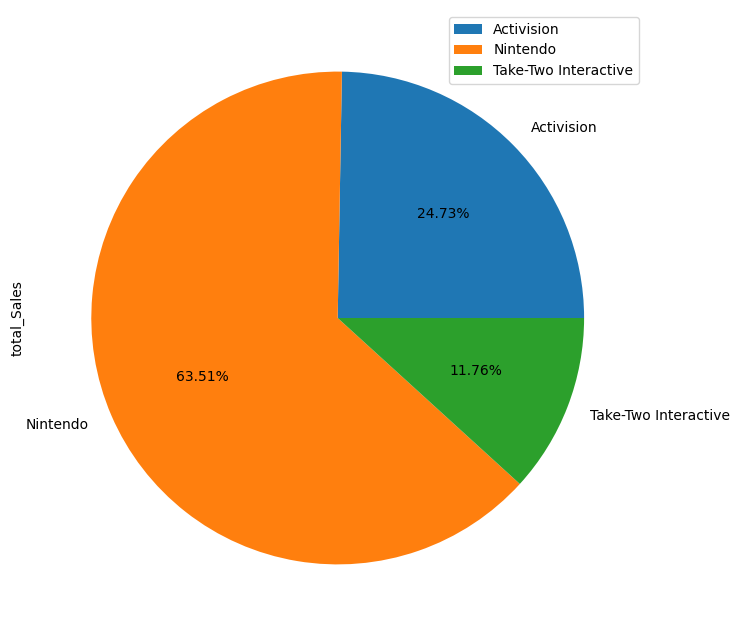

In [62]:
#total_sales 기준으로 publisher 파이그래프 그리기
df_top_game[['Publisher', 'total_Sales']].set_index('Publisher').groupby('Publisher').sum('total_Sales').plot(kind = 'pie', y = 'total_Sales',  autopct = '%0.2f%%')

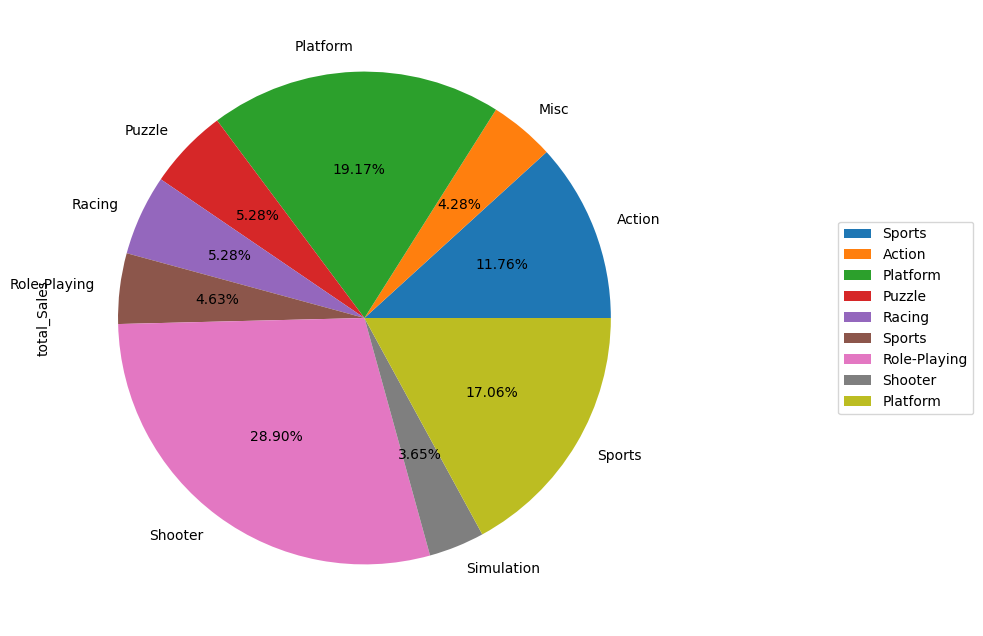

In [63]:
#Genre 기준으로
df_top_game[['Genre','total_Sales']].set_index('Genre').groupby('Genre').sum('total_Sales').plot(kind = 'pie', y = 'total_Sales', autopct = '%0.2f%%')
plt.legend(df_top_game.Genre, loc = 'center right', bbox_to_anchor = (1, 0, 0.5, 1))

#일본 포함하지 않는다면

In [64]:
data4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales_notJP,total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.76,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.13,0.38


In [65]:
df_year_trend_notJP = data4[['Genre', 'Year', 'total_Sales_notJP']]
df_year_trend_notJP

,Genre,Year,total_Sales_notJP
1,Action,2008,0.04
2,Action,2009,0.18
3,Adventure,2010,0.00
4,Misc,2010,0.04
5,Platform,2010,0.25
...,...,...,...
16594,Platform,2006,0.20
16595,Action,2005,0.01
16596,Sports,2015,0.76
16597,Action,2013,0.13


In [66]:
df_year_trend_notJP = df_year_trend_notJP.groupby(['Year', 'Genre']).sum()
# df_year_trend3 = pd.DataFrame(df_year_trend2.transform('total_Sales'))
df_year_trend_notJP = df_year_trend_notJP.unstack()


In [67]:
dyt_notJP = df_year_trend_notJP
dyt_notJP = dyt_notJP.T.fillna(0)
dyt_notJP.reset_index(inplace = True)

In [68]:
dyt_notJP = dyt_notJP.iloc[:, 1:]

In [69]:
dyt_notJP.set_index('Genre', inplace = True)
dyt_notJP

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.34,14.79,6.50,2.86,1.02,2.08,8.43,1.11,1.32,4.34,...,126.84,108.92,108.18,108.53,114.33,92.51,52.66,14.06,0.0,0.00
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,2.77,0.00,0.00,...,17.32,12.99,12.10,3.53,4.39,4.73,6.97,0.84,0.0,0.00
Fighting,0.77,0.00,0.00,0.00,0.00,0.00,0.00,3.55,0.00,0.00,...,29.16,13.36,19.18,7.74,5.95,11.35,6.99,3.21,0.0,0.00
Misc,2.70,0.00,0.87,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,70.56,84.20,51.03,18.97,22.08,21.37,9.56,0.34,0.0,0.00
Platform,0.00,6.92,5.03,3.31,0.00,34.50,1.28,1.05,22.03,15.69,...,36.11,28.30,24.63,14.70,23.01,7.61,4.76,1.97,0.0,0.00
Puzzle,0.00,2.25,10.04,0.78,0.91,1.55,0.00,0.00,3.77,30.98,...,18.62,10.62,4.14,0.78,0.75,1.09,0.17,0.00,0.0,0.00
Racing,0.00,0.48,1.57,0.00,2.86,0.00,1.55,0.00,1.95,0.00,...,33.59,33.89,31.74,14.23,12.48,15.25,7.64,1.61,0.0,0.00
Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.47,0.10,0.00,...,30.89,35.68,29.62,33.38,15.02,28.17,29.72,3.12,0.0,0.00
Shooter,7.07,10.02,3.81,0.49,29.14,0.79,1.12,0.69,0.51,0.83,...,68.53,75.24,95.18,69.78,61.00,64.91,63.43,13.54,0.0,0.00


In [70]:
dyt_analysis_notJP = dyt_notJP.iloc[:, 15 : 36]
dyt_analysis_notJP = dyt_analysis_notJP.T
dyt_analysis_notJP

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1995,2.29,0.04,7.79,3.96,10.33,0.35,4.14,1.18,1.30,2.14,4.12,4.69
1996,17.98,0.76,11.92,7.19,21.47,2.56,22.55,25.21,5.79,8.95,12.31,3.75
1997,25.32,3.92,9.20,4.70,18.15,2.04,27.83,10.26,19.99,3.73,22.45,4.24
1998,33.86,6.13,27.50,8.96,25.64,4.51,24.68,16.76,9.44,3.75,36.69,6.51
1999,24.72,6.50,11.48,16.36,19.14,1.32,33.84,29.23,11.94,5.34,23.38,14.26
2000,30.15,1.85,17.21,12.78,13.40,2.85,18.85,13.24,6.61,2.10,34.88,4.74
2001,51.78,7.89,15.37,15.13,35.79,7.24,51.13,12.47,24.28,15.77,46.00,4.72
2002,81.55,7.84,21.78,12.73,41.43,5.16,29.82,31.45,46.62,10.07,60.61,3.11
2003,63.79,1.69,20.84,20.21,37.89,1.01,48.26,20.66,26.89,19.45,51.50,6.39


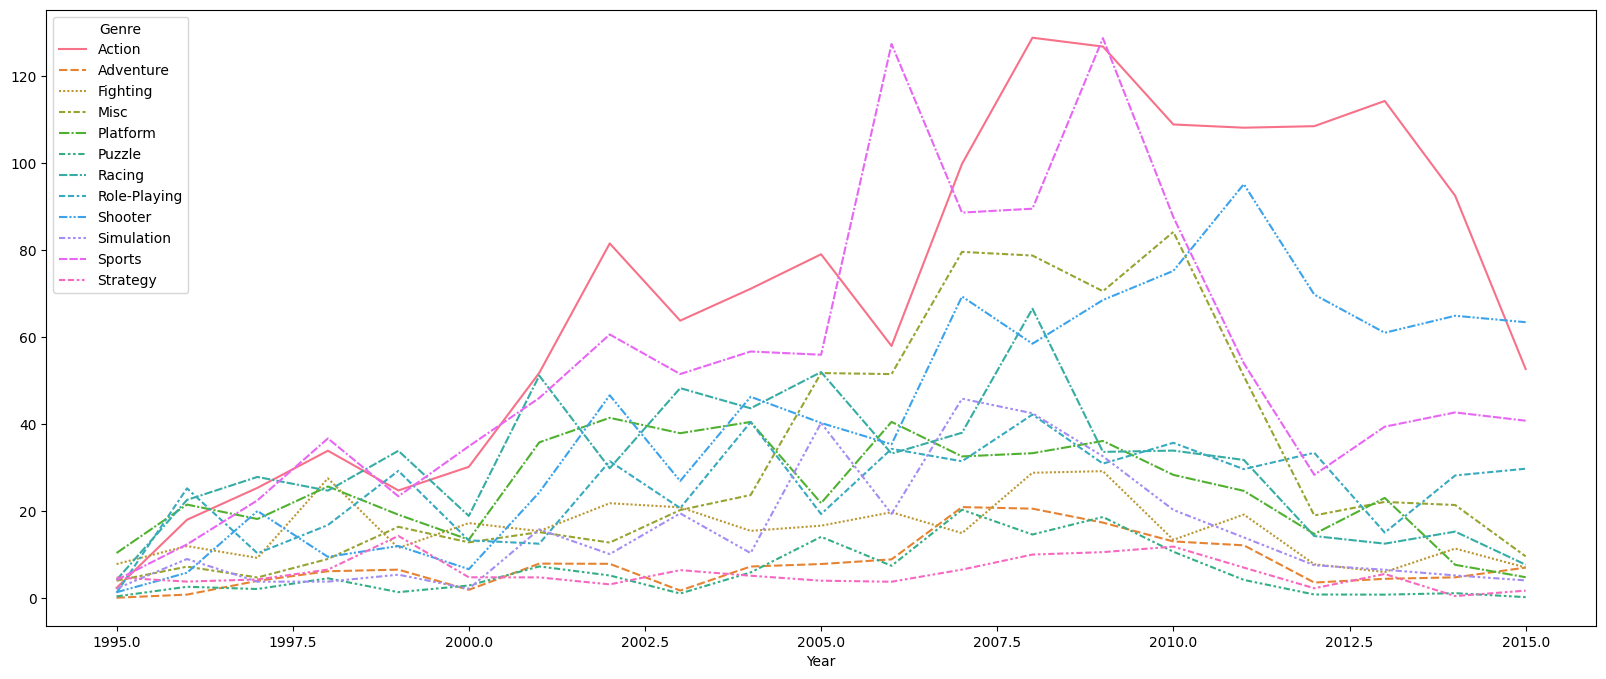

In [71]:
plt.rcParams['figure.figsize'] = [20, 8]
sns.lineplot(data = dyt_analysis_notJP)

plt.show()

#Action , Shooter 게임 출시

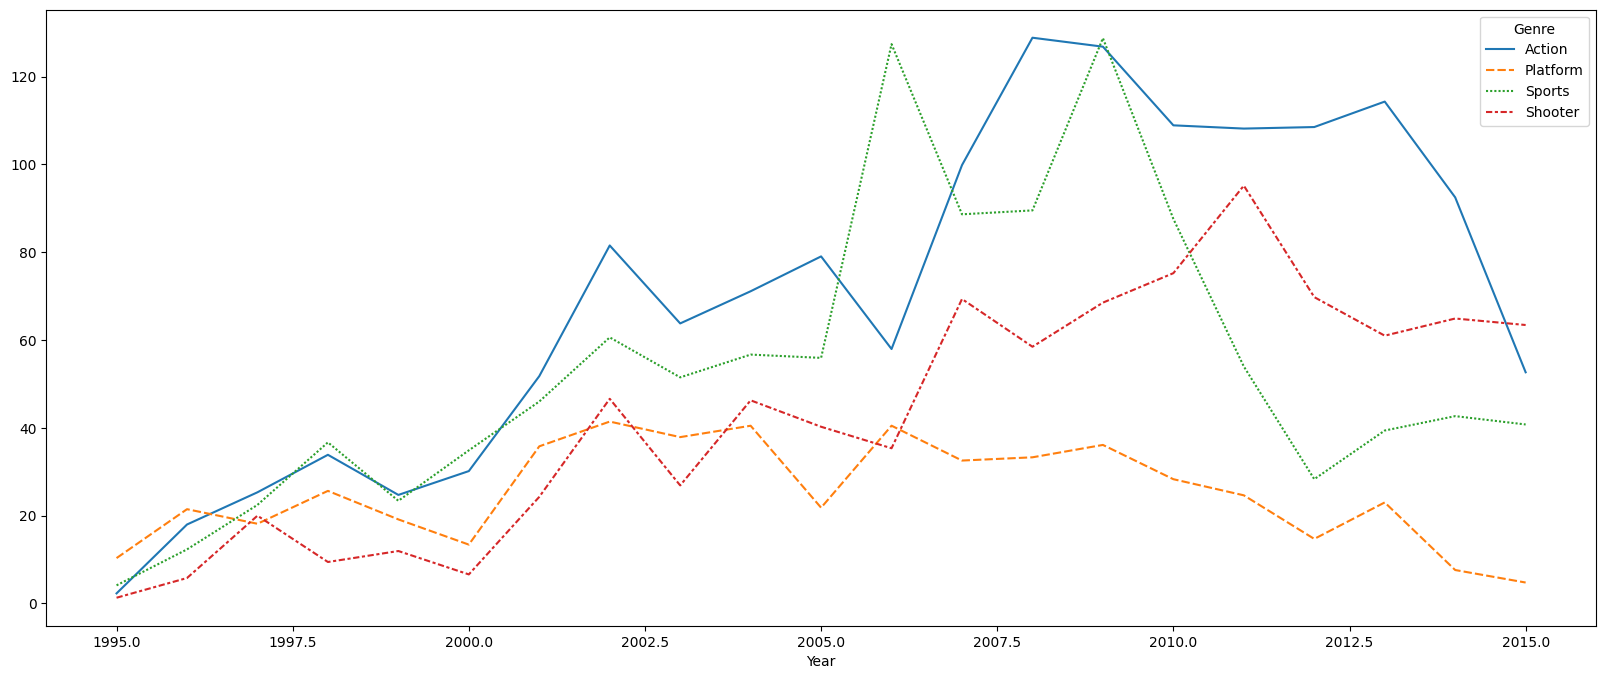

In [72]:
plt.rcParams['figure.figsize'] = [20, 8]
sns.lineplot(data = dyt_analysis_notJP[['Action','Platform','Sports','Shooter']])

plt.show()


In [73]:
df_notJP = data4[['Name', 'total_Sales_notJP']]
df_top_game_notJP = df_notJP.groupby('Name').sum()

In [74]:
df_top_game_notJP.sort_values('total_Sales_notJP', ascending = False, inplace = True)
name_notJP = df_top_game_notJP.head(20)
name_notJP['Genre'] = ['Sports', 'Action','Platform', 'Racing', 'Shooter','Puzzle','Sports','Shooter','Shooter','Shooter','Shooter','Misc','Shooter','Shooter','Platform','Platform','Action','Simulation','Misc','Platform']
name_notJP = pd.DataFrame(name_notJP)
name_notJP

<ipython-input-74-9d202618cbb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_notJP['Genre'] = ['Sports', 'Action','Platform', 'Racing', 'Shooter','Puzzle','Sports','Shooter','Shooter','Shooter','Shooter','Misc','Shooter','Shooter','Platform','Platform','Action','Simulation','Misc','Platform']


,total_Sales_notJP,Genre
Name,,
Wii Sports,78.97,Sports
Grand Theft Auto V,54.53,Action
Super Mario Bros.,38.35,Platform
Mario Kart Wii,32.04,Racing
Call of Duty: Modern Warfare 3,30.22,Shooter
Tetris,29.81,Puzzle
Wii Sports Resort,29.72,Sports
Call of Duty: Black Ops II,29.01,Shooter
Call of Duty: Black Ops,28.82,Shooter


In [75]:
# df_top_game_info_notJP = df.loc[df['Name'].isin(name_notJP.index) == True]
# df_top_game_info_notJP

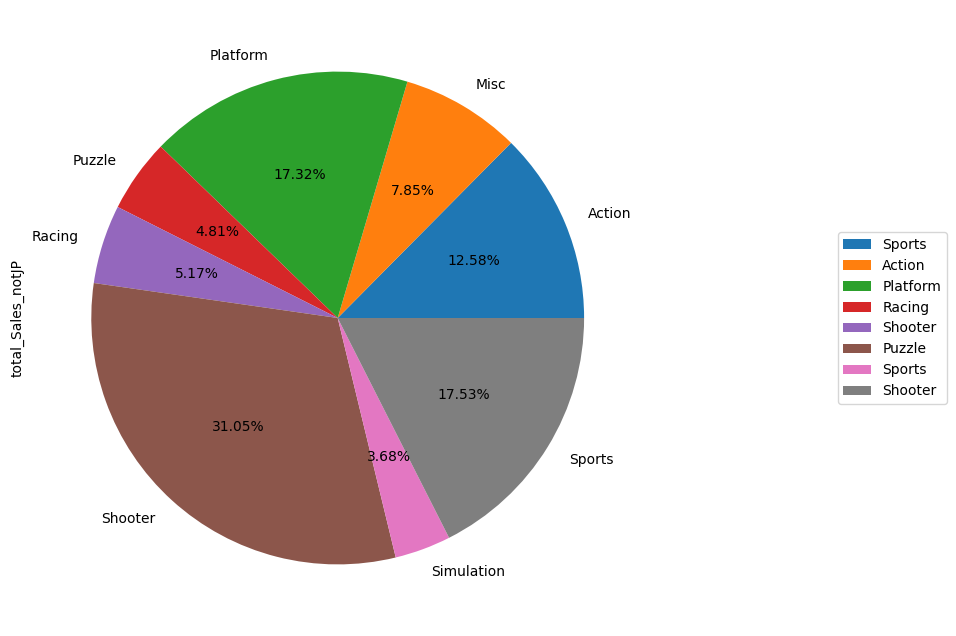

In [76]:
#일본 제외 top20개의 게임에 대한 장르별 비율
name_notJP[['Genre','total_Sales_notJP']].set_index('Genre').groupby('Genre').sum('total_Sales_notJP').plot(kind = 'pie', y = 'total_Sales_notJP', autopct = '%0.2f%%')

plt.legend(name_notJP.Genre, loc = 'center right', bbox_to_anchor = (1, 0, 0.5, 1))

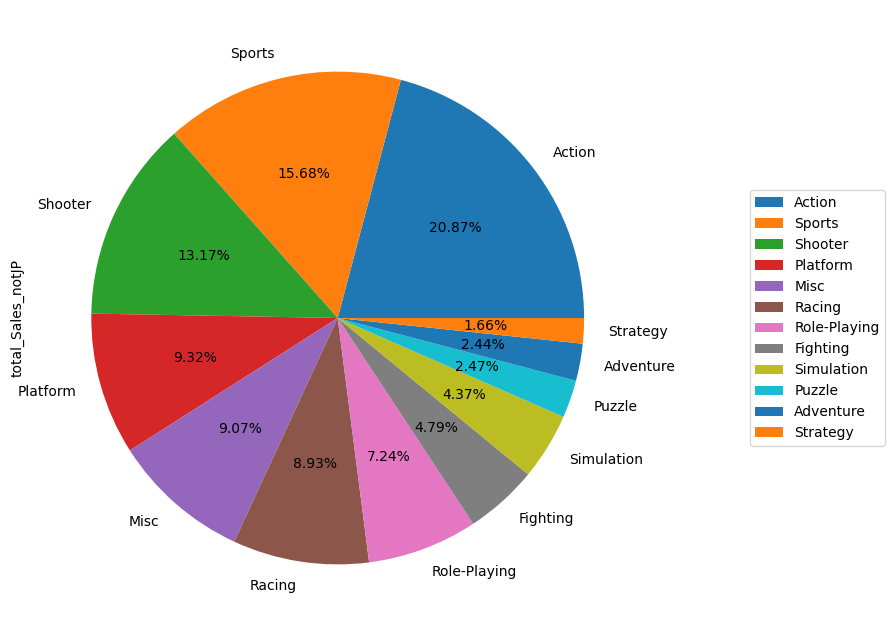

In [77]:
#일본제외 전체 판매량에 대한 비율
data5 = data4[['Genre', 'total_Sales_notJP']].set_index('Genre').groupby('Genre').sum('total_Sales_notJP').sort_values('total_Sales_notJP',ascending = False)
data5.plot(kind = 'pie', y = 'total_Sales_notJP', autopct = '%0.2f%%')
plt.legend(data5.index, loc = 'center right', bbox_to_anchor = (0.9, 0, 0.5, 1))

#onlyJP

In [78]:
df_year_trend_onlyJP = data4[['Genre', 'Year', 'JP_Sales']]
df_year_trend_onlyJP

,Genre,Year,JP_Sales
1,Action,2008,0.00
2,Action,2009,0.00
3,Adventure,2010,0.02
4,Misc,2010,0.00
5,Platform,2010,0.00
...,...,...,...
16594,Platform,2006,0.00
16595,Action,2005,0.00
16596,Sports,2015,0.03
16597,Action,2013,0.25


In [79]:
df_year_trend_onlyJP = df_year_trend_onlyJP.groupby(['Year', 'Genre']).sum()
# df_year_trend3 = pd.DataFrame(df_year_trend2.transform('total_Sales'))
df_year_trend_onlyJP = df_year_trend_onlyJP.unstack()

In [80]:
dyt_onlyJP = df_year_trend_onlyJP
dyt_onlyJP = dyt_onlyJP.T.fillna(0)
dyt_onlyJP.reset_index(inplace = True)

In [81]:
dyt_onlyJP = dyt_onlyJP.iloc[:, 1:]

In [82]:
dyt_onlyJP.set_index('Genre', inplace = True)
dyt_onlyJP

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.0,0.0,0.0,0.00,0.83,1.44,5.31,0.00,0.42,0.31,...,11.29,8.58,10.77,12.25,10.88,6.50,15.54,5.77,0.01,0.0
Adventure,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.61,0.00,0.00,...,3.33,3.58,3.72,2.37,2.22,1.36,1.04,0.95,0.00,0.0
Fighting,0.0,0.0,0.0,0.00,0.00,1.05,0.00,1.87,0.00,0.00,...,3.02,1.52,2.93,1.79,1.26,4.42,0.79,0.64,0.00,0.0
Misc,0.0,0.0,0.0,2.13,1.45,0.00,0.00,0.00,0.00,1.28,...,5.80,4.20,4.74,3.66,3.39,2.36,1.95,0.75,0.00,0.0
Platform,0.0,0.0,0.0,3.62,0.69,8.67,7.06,0.69,5.70,4.97,...,4.84,3.68,3.49,3.84,2.08,1.26,1.29,0.11,0.00,0.0
Puzzle,0.0,0.0,0.0,0.00,2.23,1.66,0.00,0.00,1.81,6.77,...,1.65,0.49,0.77,0.96,0.25,0.41,0.52,0.00,0.00,0.0
Racing,0.0,0.0,0.0,0.00,3.09,0.00,0.41,0.00,0.19,0.00,...,0.50,1.04,3.12,0.20,0.54,1.46,0.28,0.01,0.00,0.0
Role-Playing,0.0,0.0,0.0,0.00,0.00,0.00,0.52,4.18,5.78,2.20,...,17.07,17.23,14.33,14.39,15.52,17.71,6.66,3.63,0.04,0.0
Shooter,0.0,0.0,0.0,0.00,1.96,0.21,2.77,0.00,0.00,0.36,...,1.12,2.12,2.67,2.60,1.73,1.08,2.69,0.43,0.00,0.0


In [83]:
dyt_analysis_onlyJP = dyt_onlyJP.iloc[:, 15 : 36]
dyt_analysis_onlyJP = dyt_analysis_onlyJP.T
dyt_analysis_onlyJP

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1995,0.84,0.67,6.77,2.43,6.36,2.34,1.95,13.09,2.23,2.03,3.87,1.77
1996,2.62,2.60,6.12,3.47,6.76,1.36,4.40,18.78,1.11,2.38,5.08,1.86
1997,1.90,1.05,2.60,0.98,3.71,3.83,4.09,11.56,2.17,5.91,7.59,3.48
1998,5.55,2.91,4.18,2.88,3.29,1.84,2.01,11.33,0.36,3.36,5.06,6.43
1999,2.90,1.11,2.83,4.32,1.66,0.02,3.35,18.01,0.29,6.12,6.83,4.21
2000,3.74,1.11,3.05,2.77,2.56,0.98,1.15,15.80,0.20,1.27,6.36,3.58
2001,4.90,1.07,2.73,1.26,3.54,0.70,4.00,9.55,0.53,3.77,3.90,2.82
2002,5.10,3.23,3.14,2.83,4.52,0.17,0.20,13.64,1.02,0.75,4.69,2.40
2003,4.19,0.43,2.95,3.58,1.96,0.70,2.83,9.63,0.21,1.46,4.00,1.56


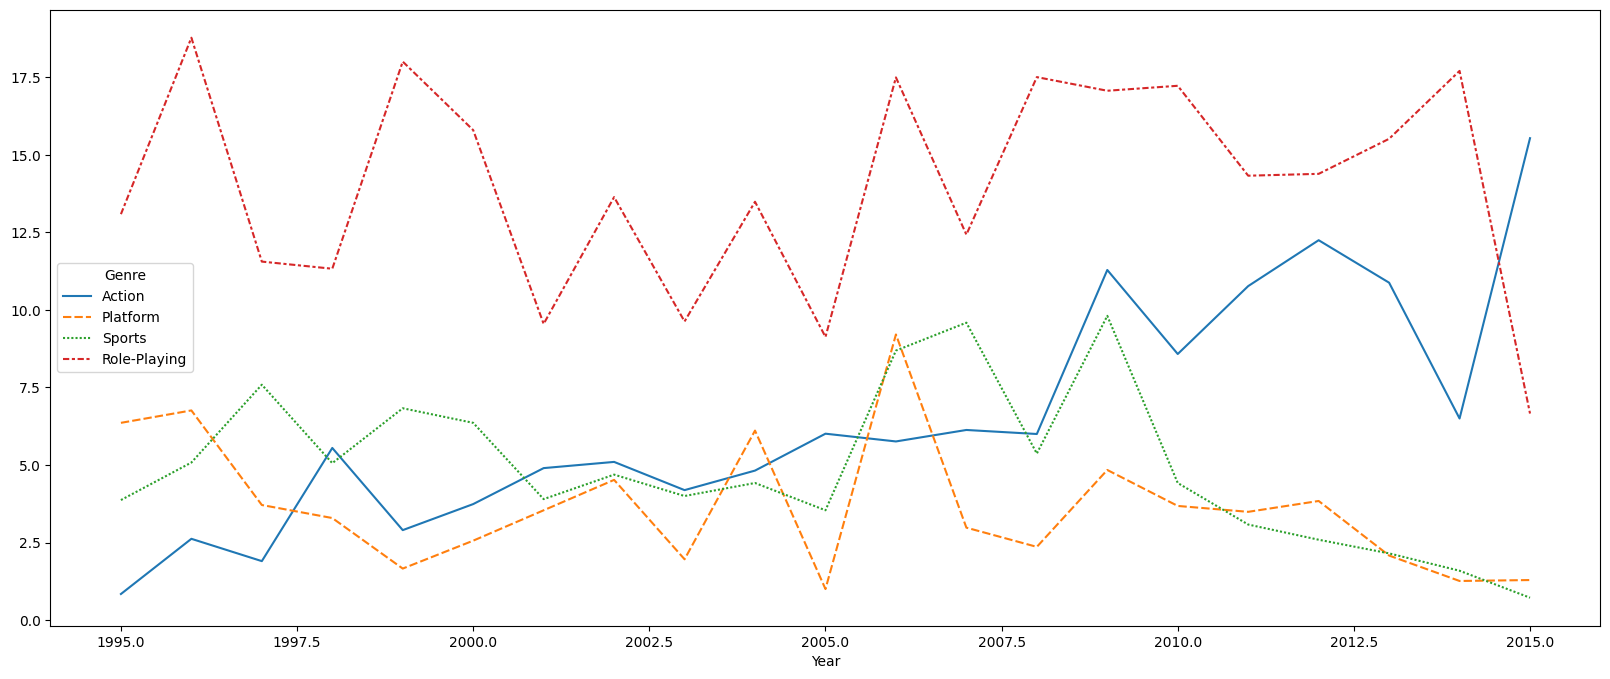

In [84]:
plt.rcParams['figure.figsize'] = [20, 8]
sns.lineplot(data = dyt_analysis_onlyJP[['Action','Platform','Sports','Role-Playing']])

plt.show()


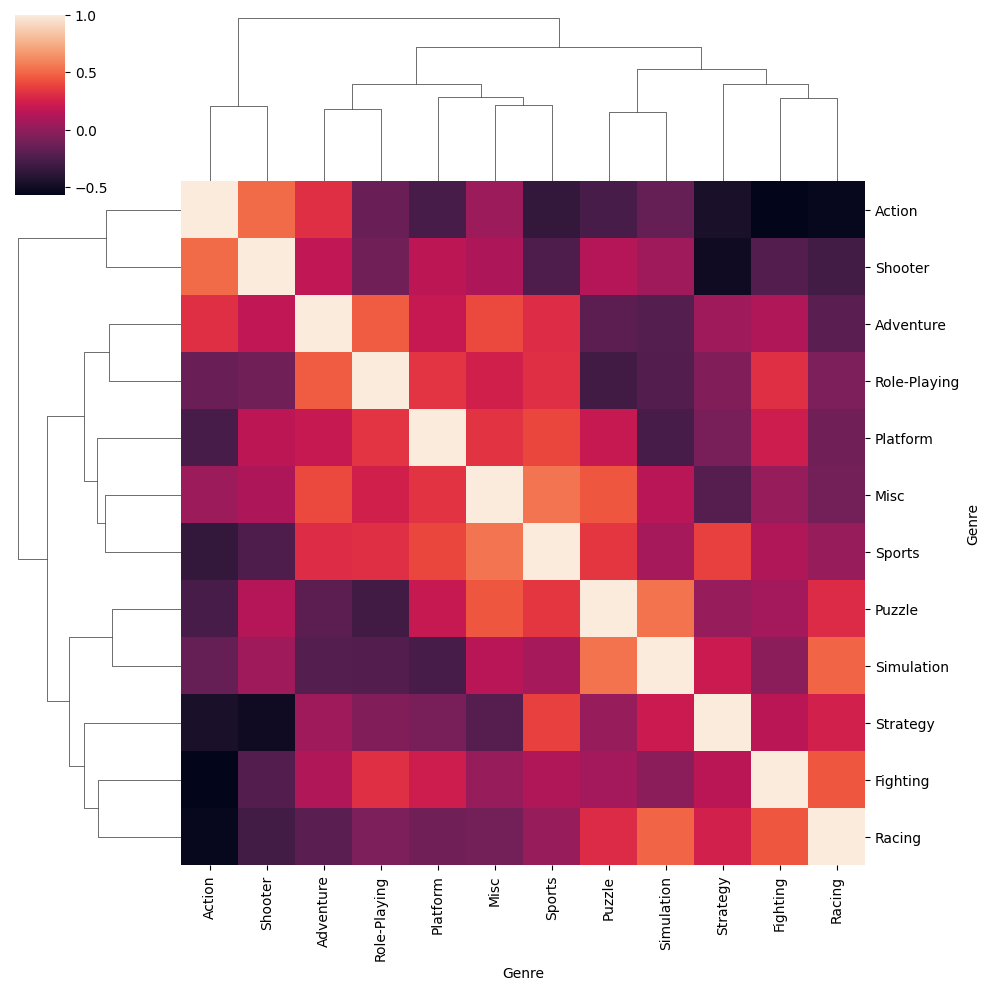

In [85]:
corrJP = dyt_analysis_onlyJP.corr()
sns.clustermap(corrJP)

In [86]:
df3 = df[['Name', 'JP_Sales']]
df_top_game_onlyJP = df3.groupby('Name').sum()
df_top_game_onlyJP.sort_values('JP_Sales', ascending = False, inplace = True)
df_top_game_onlyJP

,JP_Sales
Name,
Pokemon Red/Pokemon Blue,10.22
Pokemon Gold/Pokemon Silver,7.20
Super Mario Bros.,6.96
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04
...,...
Caesar III,0.00
Caesar IV,0.00
Caesars Palace 2000: Millennium Gold Edition,0.00


In [87]:
names_onlyJP = df_top_game_onlyJP.head(20)
df_top_game_onlyJP_info = df.loc[df['Name'].isin(names_onlyJP.index) == True]
names_onlyJP['Genre'] = ['Role-Playing','Role-Playing','Platform','Platform','Role-Playing','Puzzle','Role-Playing','Role-Playing','Simulation','Puzzle','Role-Playing','Role-Playing','Platform','Platform', 'Role-Playing','Platform','Role-Playing','Role-Playing','Simulation','Role-Playing']

<ipython-input-87-11ef3a6915c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_onlyJP['Genre'] = ['Role-Playing','Role-Playing','Platform','Platform','Role-Playing','Puzzle','Role-Playing','Role-Playing','Simulation','Puzzle','Role-Playing','Role-Playing','Platform','Platform', 'Role-Playing','Platform','Role-Playing','Role-Playing','Simulation','Role-Playing']


In [88]:
names_onlyJP

,JP_Sales,Genre
Name,,
Pokemon Red/Pokemon Blue,10.22,Role-Playing
Pokemon Gold/Pokemon Silver,7.20,Role-Playing
Super Mario Bros.,6.96,Platform
New Super Mario Bros.,6.50,Platform
Pokemon Diamond/Pokemon Pearl,6.04,Role-Playing
Tetris,6.03,Puzzle
Dragon Quest VII: Warriors of Eden,5.40,Role-Playing
Pokemon Ruby/Pokemon Sapphire,5.38,Role-Playing
Animal Crossing: Wild World,5.33,Simulation


In [89]:
df_top_game_onlyJP_info.sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales_notJP,total_Sales
8907,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01,2.32,4.36,0.41,4.74,9.10
3274,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,6.95,12.28
512,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,9.98,15.30
5219,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,1.50,5.85
9602,Dragon Quest V: Tenkuu no Hanayome,SNES,1992,Role-Playing,Enix Corporation,0.00,0.00,2.78,0.01,0.01,2.79
13268,Dragon Quest V: Tenkuu no Hanayome,PS2,2004,Role-Playing,Enix Corporation,0.00,0.00,1.65,0.00,0.00,1.65
164,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,0.20,0.14,4.10,0.02,0.36,4.46
12150,Dragon Quest VII: Warriors of Eden,3DS,2013,Role-Playing,Square Enix,0.07,0.04,1.30,0.01,0.12,1.42
14747,Dragon Quest VIII: Journey of the Cursed King,PS2,2004,Role-Playing,Square Enix,0.65,0.75,3.61,0.20,1.60,5.21
14841,Dragon Quest VIII: Journey of the Cursed King,3DS,2015,Role-Playing,Square Enix,0.00,0.00,0.86,0.00,0.00,0.86


In [90]:
#2015년 일본에서 Action 게임 급 흥행 탑 10
df_JP_Action = df.loc[(df['Year'] == 2015) & (df['Genre'] == 'Action')]
df_JP_Action.groupby('Name').sum('JP_Sales').sort_values('JP_Sales', ascending = False).head(10)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales_notJP,total_Sales
Name,,,,,,,
Monster Hunter X,2015,0.25,0.19,2.78,0.04,0.48,3.26
Yokai Watch Busters,2015,0.00,0.00,2.28,0.00,0.00,2.28
Monster Strike 3DS,2015,0.00,0.00,0.86,0.00,0.00,0.86
Dragon Quest Heroes: The World's Tree Woe and the Blight Below,4030,0.16,0.13,0.86,0.06,0.35,1.21
Metal Gear Solid V: The Phantom Pain,10075,1.78,1.94,0.71,0.63,4.35,5.06
The Legend of Zelda: Majora's Mask 3D,2015,1.14,0.54,0.47,0.17,1.85,2.32
Yakuza Zero: The Place of Oath,4030,0.00,0.00,0.42,0.00,0.00,0.42
One Piece: Pirate Warriors 3,6045,0.08,0.38,0.42,0.08,0.54,0.96
3rd Super Robot Wars Z: Tengoku-Hen,4030,0.00,0.00,0.34,0.00,0.00,0.34


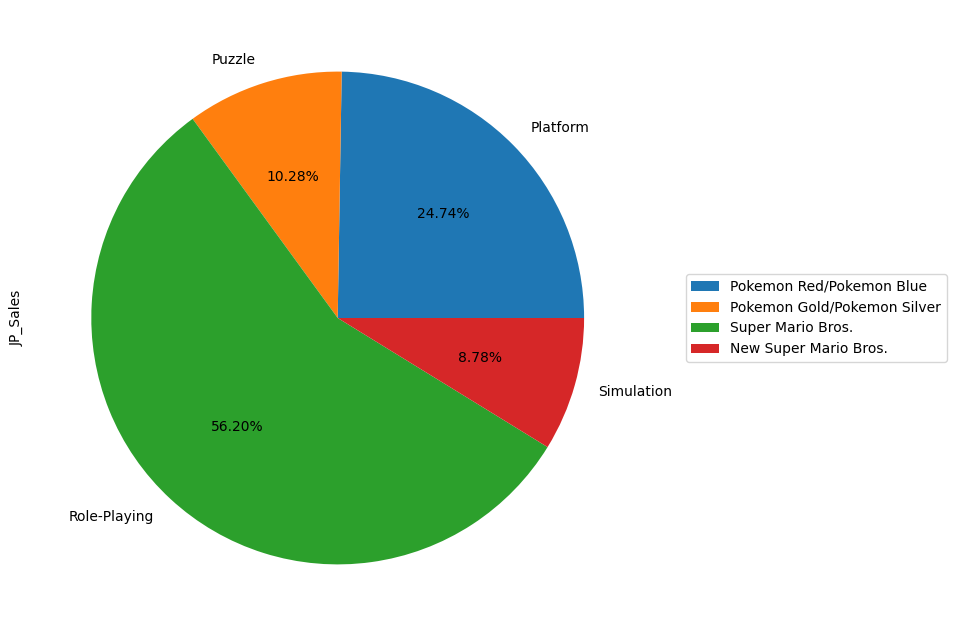

In [91]:
#top20 게임에 대한 파이그래프
names_onlyJP[['Genre','JP_Sales']].set_index('Genre').groupby('Genre').sum('JP_Sales').plot(kind = 'pie', y = 'JP_Sales', autopct = '%0.2f%%')

plt.legend(names_onlyJP.index, loc = 'center right', bbox_to_anchor = (1, 0, 0.5, 1))

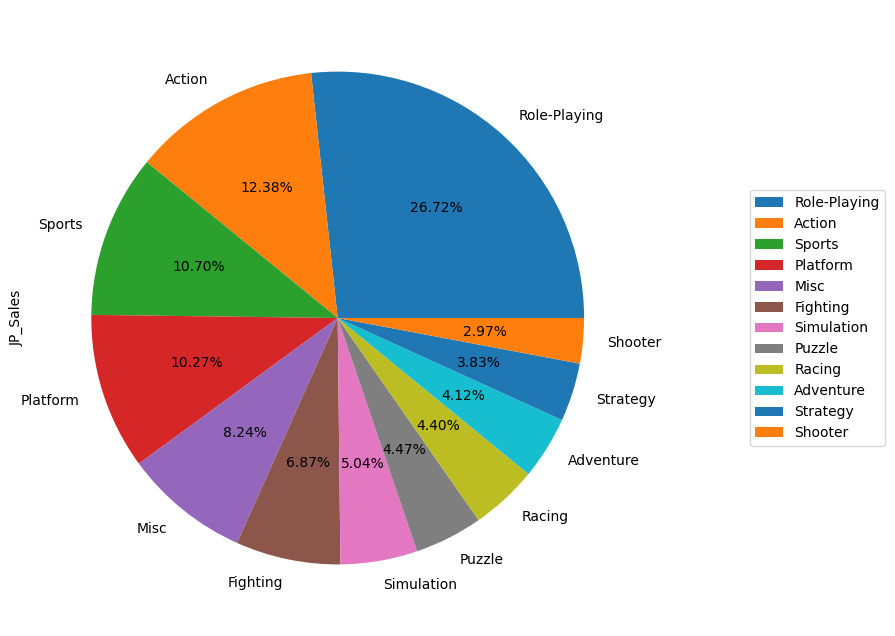

In [92]:
data6 = data4[['Genre', 'JP_Sales']].set_index('Genre').groupby('Genre').sum('JP_Sales').sort_values('JP_Sales',ascending = False)
data6.plot(kind = 'pie', y = 'JP_Sales', autopct = '%0.2f%%')
plt.legend(data6.index, loc = 'center right', bbox_to_anchor = (0.9, 0, 0.5, 1))

#연습

In [93]:
# def str_replace(x):
#     x = x.replace('M', '')
#     x = x.replace('K', '')
#     return x
# #M, K 들어가 있는 거 말고 다른 값에 대해서 else: 로 빼둬야됨....ㅠ 개삽질.. ㅠ

# s1 = str_replace('3.5K')
# type(s1)